In [110]:
import pandas as pd
import matplotlib as plt 
import numpy as np
import plotly.express as px

# Influence of papyrus characteristic evaluation

In [117]:
datasets = ['0_base_line_small',
            '1_baseline_small_big',
            '2_baseline_small_bigger',
            '3_baseline_medium_small',
            '4_baseline_medium_big',
            '5_baseline_medium_bigger',
            '6_baseline_big_small',
            '7_baseline_big_big',
            '8_baseline_big_bigger',
            '9_mean_small_small',
            '10_mean_small_big',
            '11_mean_small_bigger',
            '12_mean_medium_small',
            '13_mean_medium_big',
            '14_mean_medium_bigger',
            '15_mean_big_small',
            '16_mean_big_big',
            '17_mean_big_bigger',
            '18_text_small_small',
            '19_text_small_big',
            '20_text_small_bigger',
            '21_text_medium_small',
            '22_text_medium_big',
            '23_text_medium_bigger',
            '24_text_big_small',
            '25_text_big_big',
            '26_text_big_bigger',
           ]

# Get the metrics for validation

In [118]:
maps_image = []
accs_image = []
maps_patched = []
accs_patched = []

for dataset in datasets:
    
    # validation
    out = f'/Users/beantown/PycharmProjects/master-thesis/results/{dataset}/logs/'
        
    log_file = out + 'img_val_acc.csv'
    df_image  = pd.read_csv(log_file, index_col=0)
    df_image = df_image[df_image.classes != 15110]
    df_image = df_image[df_image.classes != 131661]
    
    map_image = round(df_image.mean_average_precision.mean(),2)
    acc_image = round(df_image.precision_at_1.mean(),2)
    maps_image.append(map_image)
    accs_image.append(acc_image)
    
    log_file = out + 'patched_val_acc.csv'
    df_patched  = pd.read_csv(log_file, index_col=0)
    df_patched = df_patched[df_patched.classes != 15110]
    df_patched = df_patched[df_patched.classes != 131661]
    map_patched = round(df_patched.mean_average_precision.mean(),2)
    acc_patched = round(df_patched.precision_at_1.mean(),2)
    maps_patched.append(map_patched)
    accs_patched.append(acc_patched)
    
    if False:
        print(f'Results {dataset}:')
        print(f'mAP: {map_image}')
        print(f'mAP: {acc_image}')
        print('')

In [119]:
df_map_image = pd.DataFrame(datasets, columns=['dataset'])
df_map_image['value'] = maps_image
df_map_image['type'] = 'fragment level'

df_map_patches = pd.DataFrame(datasets, columns=['dataset'])
df_map_patches['value'] = maps_patched
df_map_patches['type'] = 'patch level'

df_acc_image = pd.DataFrame(datasets, columns=['dataset'])
df_acc_image['value'] = accs_image
df_acc_image['type'] = 'fragment level'

df_acc_patches = pd.DataFrame(datasets, columns=['dataset'])
df_acc_patches['value'] = accs_patched
df_acc_patches['type'] = 'patch level'

## Get training metrics

## mAP

In [120]:
frames = [df_map_image, df_map_patches]
df = pd.concat(frames)
df.head()

,dataset,value,type
0,0_base_line_small,0.36,fragment level
1,1_baseline_small_big,0.46,fragment level
2,2_baseline_small_bigger,0.42,fragment level
3,3_baseline_medium_small,0.40,fragment level
4,4_baseline_medium_big,0.53,fragment level


In [121]:
#df

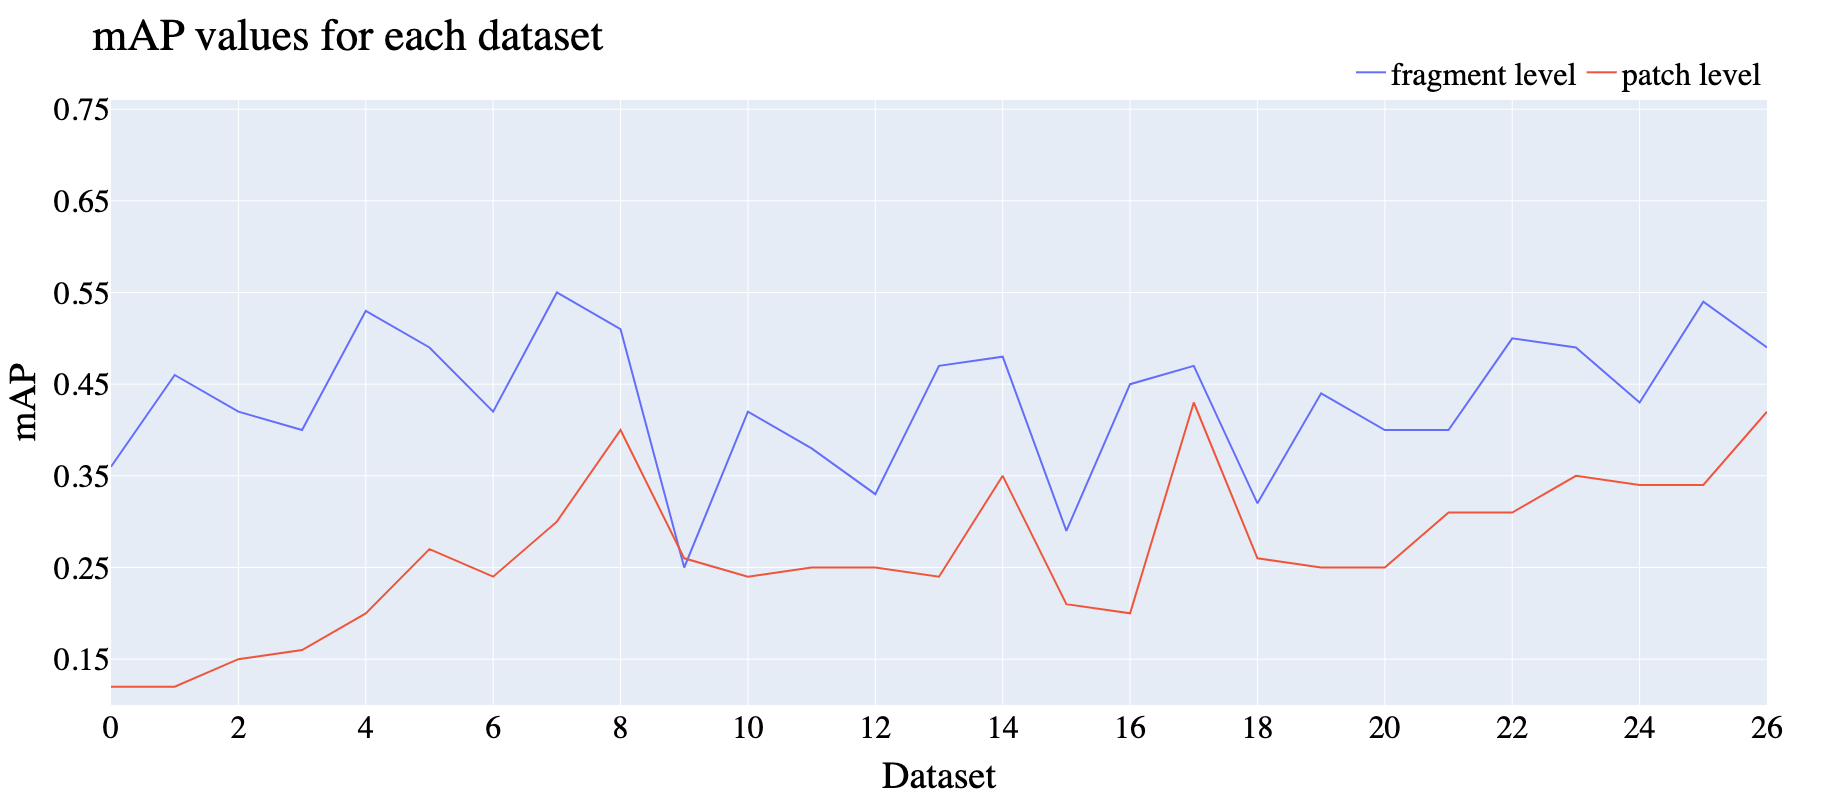

In [122]:
fig = px.line(df,
              x="dataset",
              y="value",
              color='type',
            title='mAP values for each dataset',
                 width=1200, height=800)


fig.update_layout(
    xaxis = dict(
        title = 'Dataset',
        tickmode = 'array',
    tickvals = [0,2, 4, 6,8, 10,12,14,16,18,20,22,24,26],
        ticktext = [0,2, 4, 6,8, 10,12,14,16,18,20,22,24,26]
    ),
    yaxis = dict(
        title = 'mAP',
      tickmode = 'array',
    range=[0.10, 0.76],
    tickvals = [0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75],
        ticktext = [0.15, 0.25, 0.35, 0.45, 0.55,0.65, 0.75],
    ),
    font=dict(family="Serif",size=32,color='black'),
    legend=dict(title='', orientation="h",
    yanchor="bottom",
    y=1.0,
    xanchor="right",
    x=1))
    

fig.write_image("images/map_final.pdf")    
fig.show()

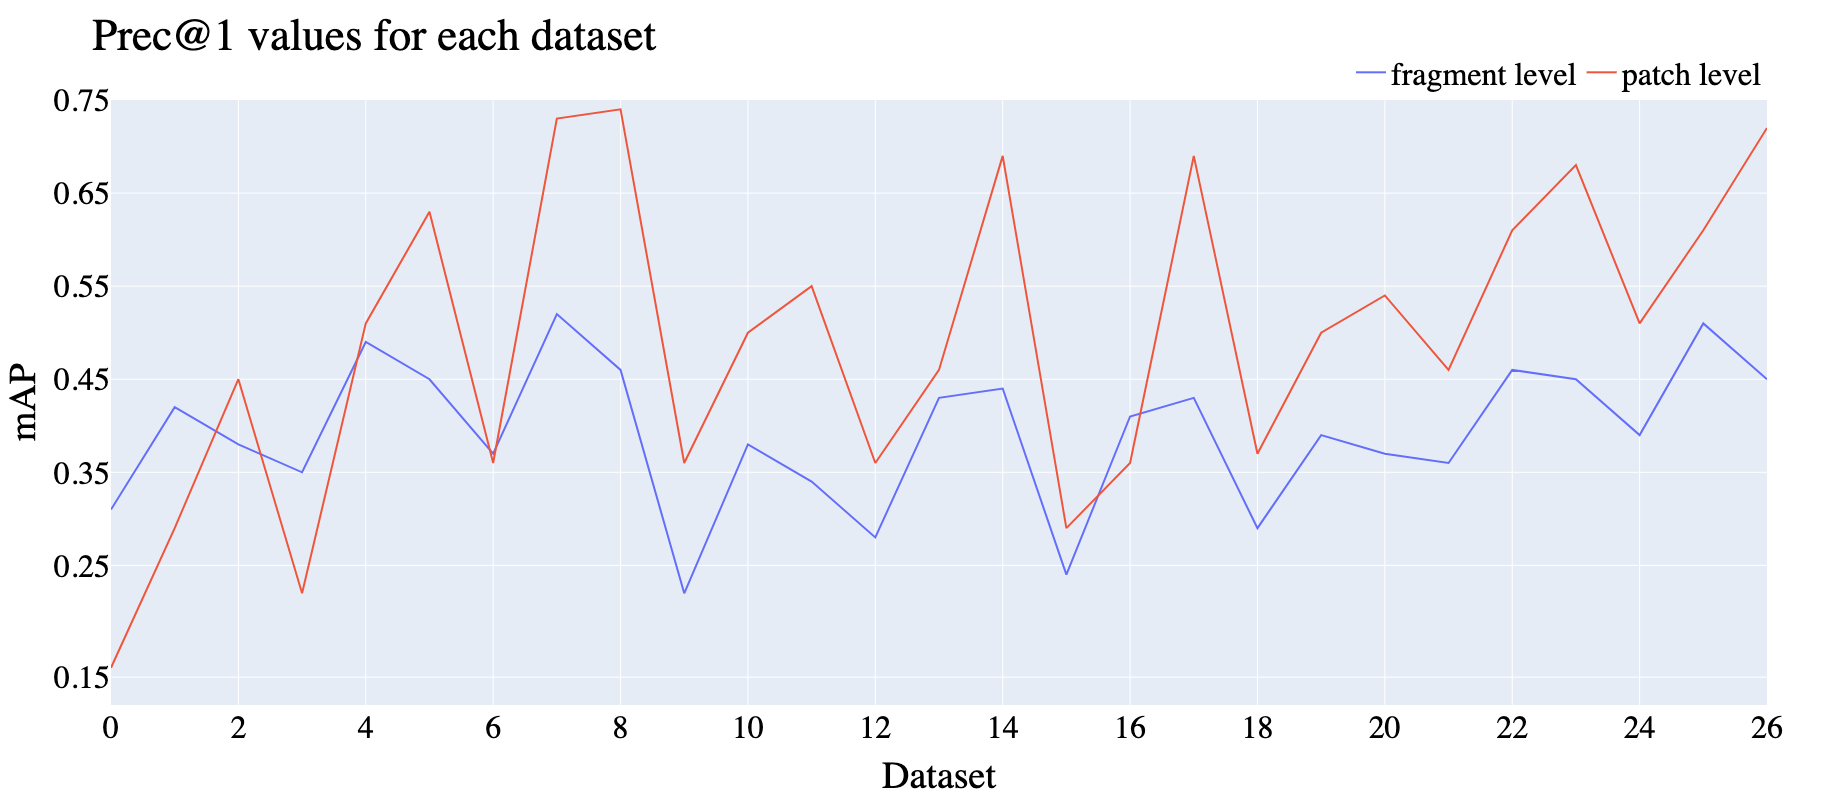

In [123]:
frames = [df_acc_image, df_acc_patches]
df = pd.concat(frames)

fig = px.line(df,
              x="dataset",
              y="value",
              color='type',
            title='Prec@1 values for each dataset',
              width=1200, height=800)


fig.update_layout(
  xaxis = dict(
        title = 'Dataset',
        tickmode = 'array',
    tickvals = [0,2, 4, 6,8, 10,12,14,16,18,20,22,24,26],
        ticktext = [0,2, 4, 6,8, 10,12,14,16,18,20,22,24,26]
    ),
    yaxis = dict(
        title = 'mAP',
      tickmode = 'array',
            range=[0.1, 0.75],
    tickvals = [0.13, 0.25, 0.35, 0.45, 0.55, 0.65,0.75],
        ticktext = [0.15, 0.25, 0.35, 0.45, 0.55, 0.65,0.75],
    ),
    font=dict(family="Serif",size=32,color='black'),
    legend=dict(title='', orientation="h",
    yanchor="bottom",
    y=1.0,
    xanchor="right",
    x=1))
    


fig.write_image("images/top_1_final.pdf")
fig.show()

## RestNet

In [8]:
ref_datasets = [
            '7_baseline_big_big',            
            '14_mean_medium_bigger',            
            '25_text_big_big',
           ]

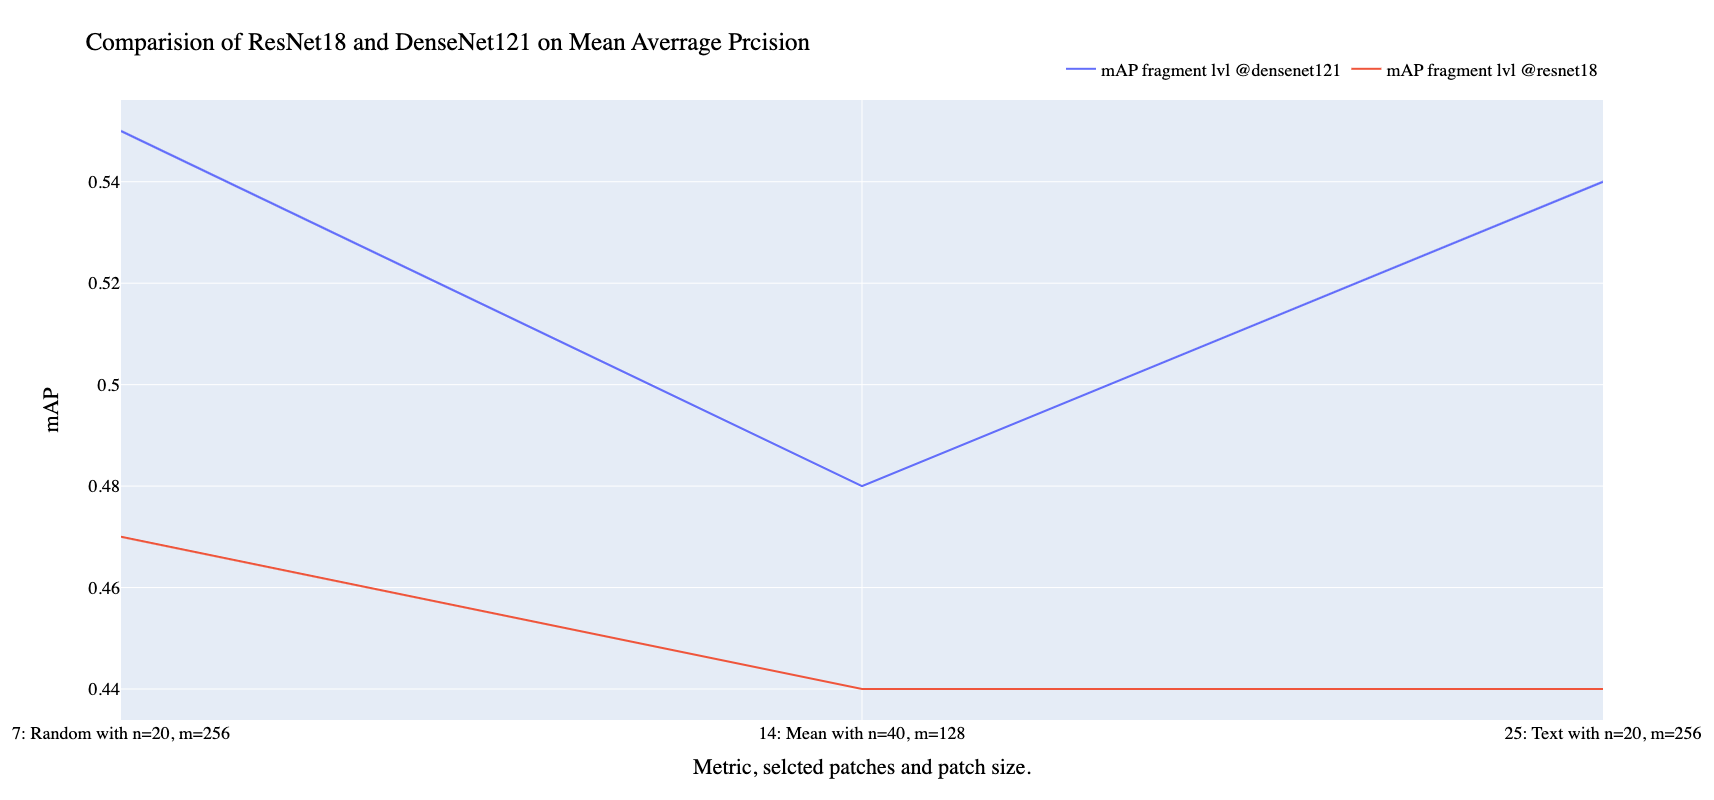

In [9]:
maps_ref = []
accs_ref = []
maps_test = []
accs_test = []

for dataset in ref_datasets:
    
    # validation
    out_ref = f'/Users/beantown/PycharmProjects/master-thesis/results/{dataset}/logs/'
    out_resnet = f'/Users/beantown/PycharmProjects/master-thesis/results/resnet/{dataset}/logs/'
    
    log_file = out_ref + 'img_val_acc.csv'
    df_ref  = pd.read_csv(log_file, index_col=0)
    df_ref = df_ref[df_ref.classes != 15110]
    df_ref = df_ref[df_ref.classes != 131661]
    
    map_ref = round(df_ref.mean_average_precision.mean(),2)
    acc_ref = round(df_ref.precision_at_1.mean(),2)
    maps_ref.append(map_ref)
    accs_ref.append(acc_ref)
    
    log_file = out_resnet + 'img_val_acc.csv'
    df_test  = pd.read_csv(log_file, index_col=0)
    df_test = df_test[df_test.classes != 15110]
    df_test = df_test[df_test.classes != 131661]
    map_test = round(df_test.mean_average_precision.mean(),2)
    acc_test = round(df_test.precision_at_1.mean(),2)
    maps_test.append(map_test)
    accs_test.append(acc_test)
    
    if False:
        print(f'Results {ref_datasets}:')
        print(f'mAP: {map_image}')
        print(f'mAP: {acc_image}')
        print('')
        
df_map_ref = pd.DataFrame(ref_datasets, columns=['dataset'])
df_map_ref['mAP'] = maps_ref
df_map_ref['type'] = 'mAP fragment lvl @densenet121'

df_map_test = pd.DataFrame(ref_datasets, columns=['dataset'])
df_map_test['mAP'] = maps_test
df_map_test['type'] = 'mAP fragment lvl @resnet18'

df_acc_ref = pd.DataFrame(ref_datasets, columns=['dataset'])
df_acc_ref['value'] = accs_ref
df_acc_ref['type'] = 'top-1-accuracy fragment lvl @densnet121 '

df_acc_test = pd.DataFrame(ref_datasets, columns=['dataset'])
df_acc_test['value'] = accs_test
df_acc_test['type'] = 'top-1-accuracy fragment lvl @resnet18'

frames = [df_map_ref, df_map_test]
df = pd.concat(frames)
#df.head()

fig = px.line(df,
              x="dataset",
              y="mAP",
              color='type',
            title='Comparision of ResNet18 and DenseNet121 on Mean Averrage Prcision',
             width=1000, height=800)


fig.update_layout(
       xaxis = dict(
           title = 'Metric, selcted patches and patch size.',
        tickmode = 'array',
        tickvals = [0, 1, 2],
        ticktext = ['7: Random with n=20, m=256',                                        
                    '14: Mean with n=40, m=128',                    
                    '25: Text with n=20, m=256',]
    ),    
    font=dict(family="Serif",size=18,color='black'),
  legend=dict(title='', orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1))
    
fig.show()

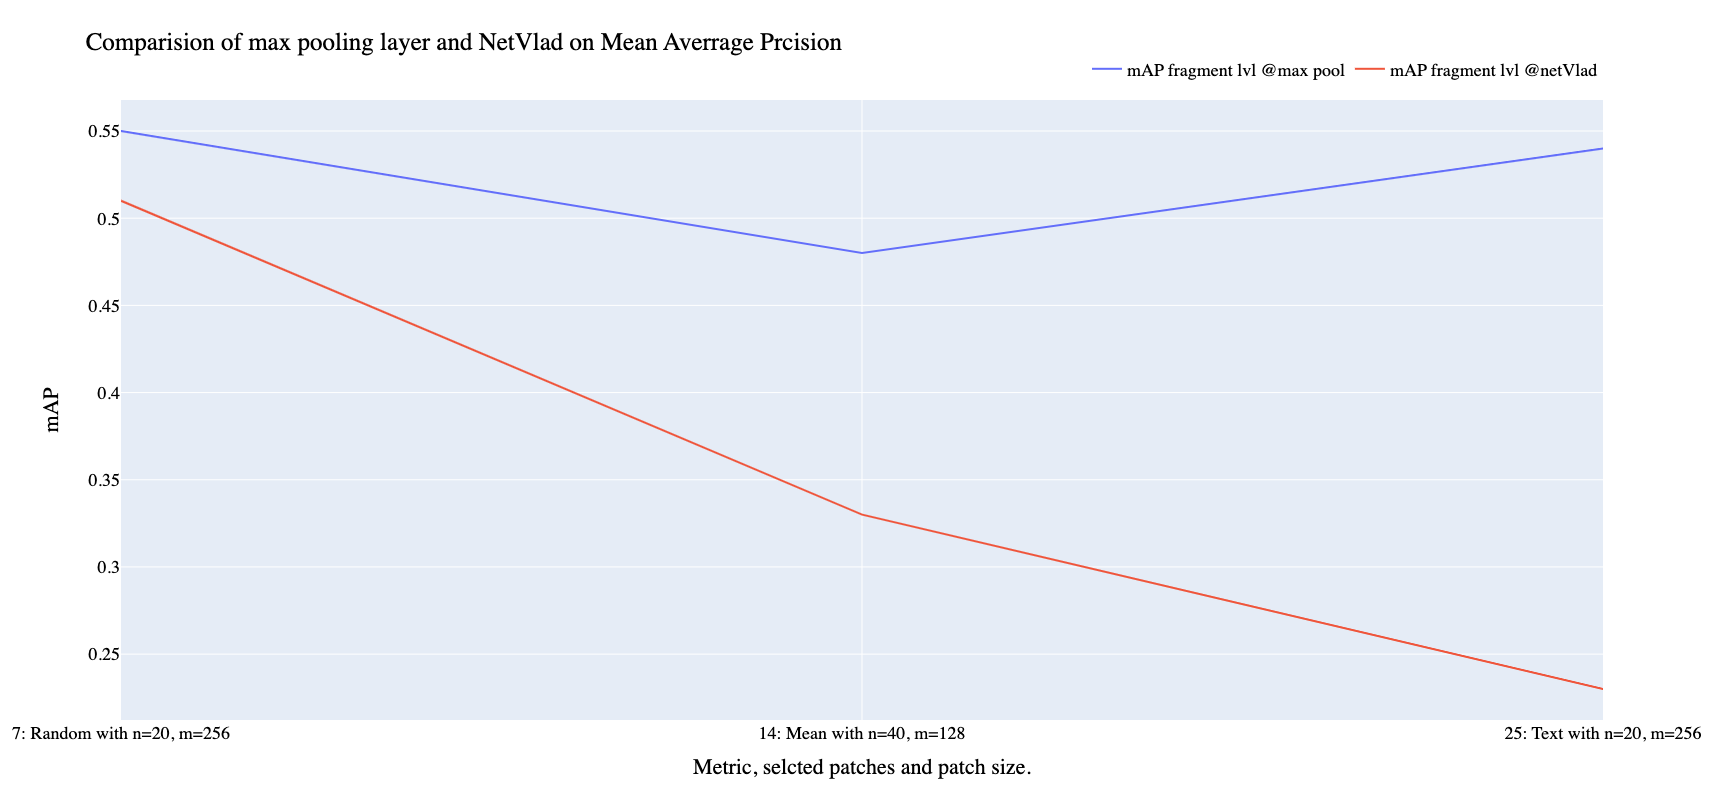

In [26]:
maps_ref = []
accs_ref = []
maps_test = []
accs_test = []

for dataset in ref_datasets:
    
    # validation
    out_ref = f'/Users/beantown/PycharmProjects/master-thesis/results/{dataset}/logs/'
    out_resnet = f'/Users/beantown/PycharmProjects/master-thesis/results/netvlad/{dataset}/logs/'
    
    log_file = out_ref + 'img_val_acc.csv'
    df_ref  = pd.read_csv(log_file, index_col=0)
    df_ref = df_ref[df_ref.classes != 15110]
    df_ref = df_ref[df_ref.classes != 131661]
    
    map_ref = round(df_ref.mean_average_precision.mean(),2)
    acc_ref = round(df_ref.precision_at_1.mean(),2)
    maps_ref.append(map_ref)
    accs_ref.append(acc_ref)
    
    log_file = out_resnet + 'img_val_acc.csv'
    df_test  = pd.read_csv(log_file, index_col=0)
    df_test = df_test[df_test.classes != 15110]
    df_test = df_test[df_test.classes != 131661]
    map_test = round(df_test.mean_average_precision.mean(),2)
    acc_test = round(df_test.precision_at_1.mean(),2)
    maps_test.append(map_test)
    accs_test.append(acc_test)
    
    if False:
        print(f'Results {ref_datasets}:')
        print(f'mAP: {map_image}')
        print(f'mAP: {acc_image}')
        print('')
        
df_map_ref = pd.DataFrame(ref_datasets, columns=['dataset'])
df_map_ref['mAP'] = maps_ref
df_map_ref['type'] = 'mAP fragment lvl @max pool'

df_map_test = pd.DataFrame(ref_datasets, columns=['dataset'])
df_map_test['mAP'] = maps_test
df_map_test['type'] = 'mAP fragment lvl @netVlad'

df_acc_ref = pd.DataFrame(ref_datasets, columns=['dataset'])
df_acc_ref['value'] = accs_ref
df_acc_ref['type'] = 'top-1-accuracy fragment lvl @max pool'

df_acc_test = pd.DataFrame(ref_datasets, columns=['dataset'])
df_acc_test['value'] = accs_test
df_acc_test['type'] = 'top-1-accuracy fragment lvl @netVlad'

frames = [df_map_ref, df_map_test]
df = pd.concat(frames)
#df.head()

fig = px.line(df,
              x="dataset",
              y="mAP",
              color='type',
            title='Comparision of max pooling layer and NetVlad on Mean Averrage Prcision',width=1000, height=800)


fig.update_layout(
       xaxis = dict(
           title = 'Metric, selcted patches and patch size.',
        tickmode = 'array',
        tickvals = [0, 1, 2],
        ticktext = ['7: Random with n=20, m=256',                                        
                    '14: Mean with n=40, m=128',                    
                    '25: Text with n=20, m=256',]
    ),    
    font=dict(family="Serif",size=18,color='black'),
  legend=dict(title='', orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1))
    
fig.show()

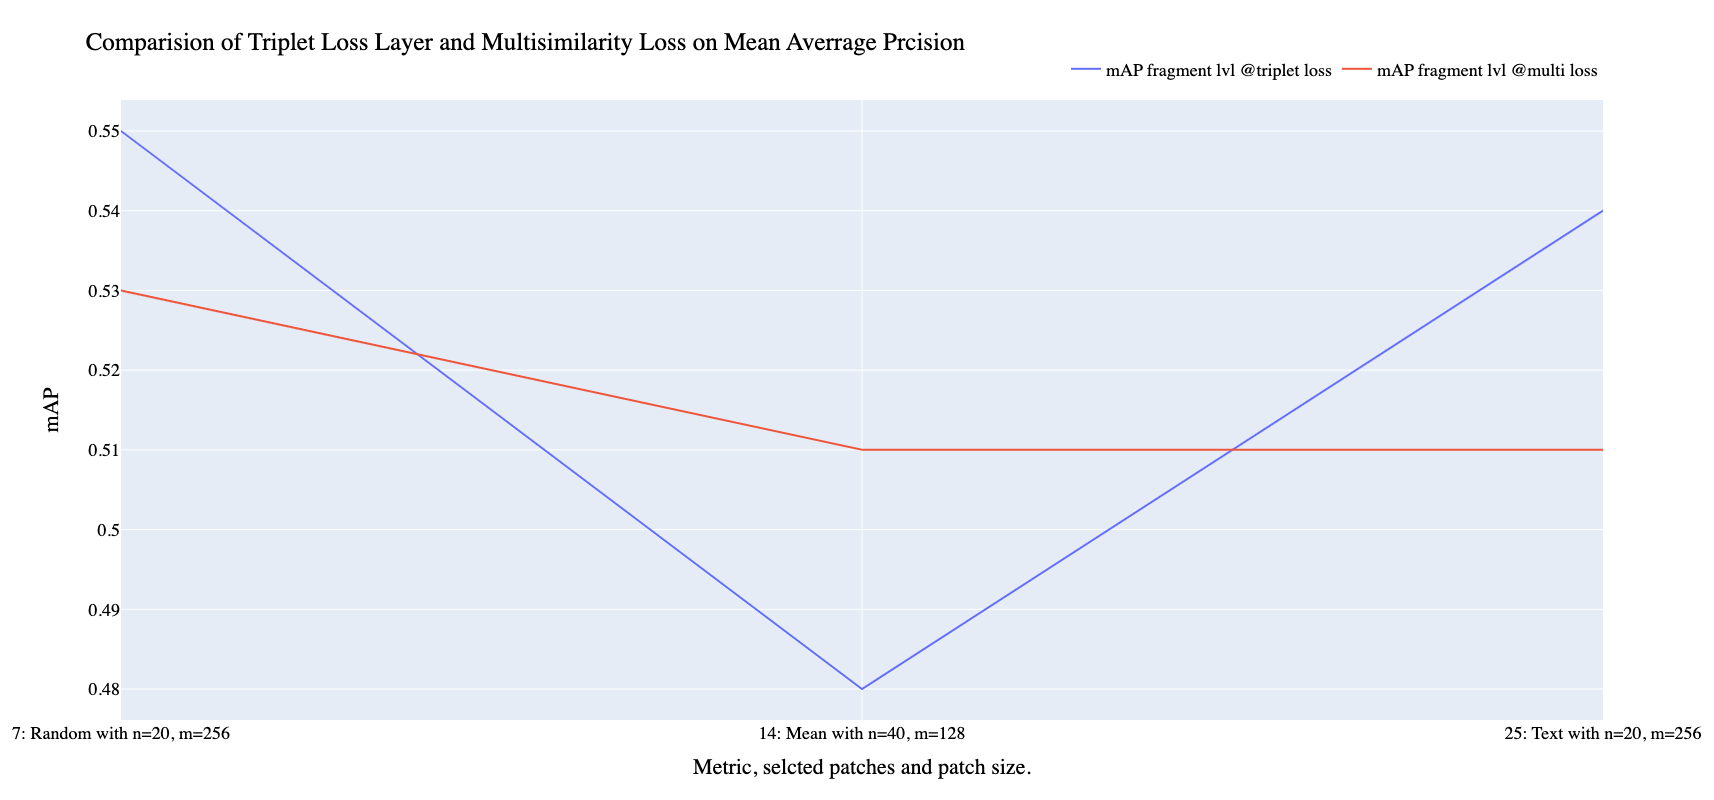

In [27]:
maps_ref = []
accs_ref = []
maps_test = []
accs_test = []

for dataset in ref_datasets:
    
    # validation
    out_ref = f'/Users/beantown/PycharmProjects/master-thesis/results/{dataset}/logs/'
    out_resnet = f'/Users/beantown/PycharmProjects/master-thesis/results/multi_loss/{dataset}/logs/'
    
    log_file = out_ref + 'img_val_acc.csv'
    df_ref  = pd.read_csv(log_file, index_col=0)
    df_ref = df_ref[df_ref.classes != 15110]
    df_ref = df_ref[df_ref.classes != 131661]
    
    map_ref = round(df_ref.mean_average_precision.mean(),2)
    acc_ref = round(df_ref.precision_at_1.mean(),2)
    maps_ref.append(map_ref)
    accs_ref.append(acc_ref)
    
    log_file = out_resnet + 'img_val_acc.csv'
    df_test  = pd.read_csv(log_file, index_col=0)
    df_test = df_test[df_test.classes != 15110]
    df_test = df_test[df_test.classes != 131661]
    map_test = round(df_test.mean_average_precision.mean(),2)
    acc_test = round(df_test.precision_at_1.mean(),2)
    maps_test.append(map_test)
    accs_test.append(acc_test)
    
    if False:
        print(f'Results {ref_datasets}:')
        print(f'mAP: {map_image}')
        print(f'mAP: {acc_image}')
        print('')
        
df_map_ref = pd.DataFrame(ref_datasets, columns=['dataset'])
df_map_ref['mAP'] = maps_ref
df_map_ref['type'] = 'mAP fragment lvl @triplet loss'

df_map_test = pd.DataFrame(ref_datasets, columns=['dataset'])
df_map_test['mAP'] = maps_test
df_map_test['type'] = 'mAP fragment lvl @multi loss'

df_acc_ref = pd.DataFrame(ref_datasets, columns=['dataset'])
df_acc_ref['value'] = accs_ref
df_acc_ref['type'] = 'top-1-accuracy fragment lvl @triplet loss'

df_acc_test = pd.DataFrame(ref_datasets, columns=['dataset'])
df_acc_test['value'] = accs_test
df_acc_test['type'] = 'top-1-accuracy fragment lvl @multi loss'

frames = [df_map_ref, df_map_test]
df = pd.concat(frames)
#df.head()

fig = px.line(df,
              x="dataset",
              y="mAP",
              color='type',
            title='Comparision of Triplet Loss Layer and Multisimilarity Loss on Mean Averrage Prcision',width=1000, height=800)


fig.update_layout(
       xaxis = dict(
           title = 'Metric, selcted patches and patch size.',
        tickmode = 'array',
        tickvals = [0, 1, 2],
        ticktext = ['7: Random with n=20, m=256',                                        
                    '14: Mean with n=40, m=128',                    
                    '25: Text with n=20, m=256',]
    ),    
    font=dict(family="Serif",size=18,color='black'),
  legend=dict(title='', orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1))
    
fig.show()

In [28]:
datasets = [
            '7_baseline_big_big_0',            
            '7_baseline_big_big_1',            
            '7_baseline_big_big_2',
            '7_baseline_big_big_3',
            '7_baseline_big_big_4',
            '7_baseline_big_big_5',
            '7_baseline_big_big_6',
            '7_baseline_big_big_6',
           ]

In [29]:
maps_image = []
accs_image = []
maps_patched = []
accs_patched = []

for dataset in datasets:
    
    # validation
    out = f'/Users/beantown/PycharmProjects/master-thesis/results/var/{dataset}/logs/'
    
    log_file = out + 'img_val_acc.csv'
    df_image  = pd.read_csv(log_file, index_col=0)
    df_image = df_image[df_image.classes != 15110]
    df_image = df_image[df_image.classes != 131661]
    
    map_image = round(df_image.mean_average_precision.mean(),2)
    acc_image = round(df_image.precision_at_1.mean(),2)
    maps_image.append(map_image)
    accs_image.append(acc_image)
    
    log_file = out + 'patched_val_acc.csv'
    df_patched  = pd.read_csv(log_file, index_col=0)
    df_patched = df_patched[df_patched.classes != 15110]
    df_patched = df_patched[df_patched.classes != 131661]
    map_patched = round(df_patched.mean_average_precision.mean(),2)
    acc_patched = round(df_patched.precision_at_1.mean(),2)
    maps_patched.append(map_patched)
    accs_patched.append(acc_patched)
    
    if False:
        print(f'Results {dataset}:')
        print(f'mAP: {map_image}')
        print(f'mAP: {acc_image}')
        print('')

In [30]:
df_map_image = pd.DataFrame(datasets, columns=['dataset'])
df_map_image['value'] = maps_image
df_map_image['type'] = 'mAP @ fragment level'

df_map_patches = pd.DataFrame(datasets, columns=['dataset'])
df_map_patches['value'] = maps_patched
df_map_patches['type'] = 'mAP @ patch level'

df_acc_image = pd.DataFrame(datasets, columns=['dataset'])
df_acc_image['value'] = accs_image
df_acc_image['type'] = 'top-1-accuracy @ fragment level'

df_acc_patches = pd.DataFrame(datasets, columns=['dataset'])
df_acc_patches['value'] = accs_patched
df_acc_patches['type'] = 'top-1-accuracy @ patch level'

In [31]:
frames = [df_map_image, df_map_patches]
df = pd.concat(frames)
df.head()

,dataset,value,type
0,7_baseline_big_big_0,0.55,mAP @ fragment level
1,7_baseline_big_big_1,0.47,mAP @ fragment level
2,7_baseline_big_big_2,0.48,mAP @ fragment level
3,7_baseline_big_big_3,0.49,mAP @ fragment level
4,7_baseline_big_big_4,0.48,mAP @ fragment level


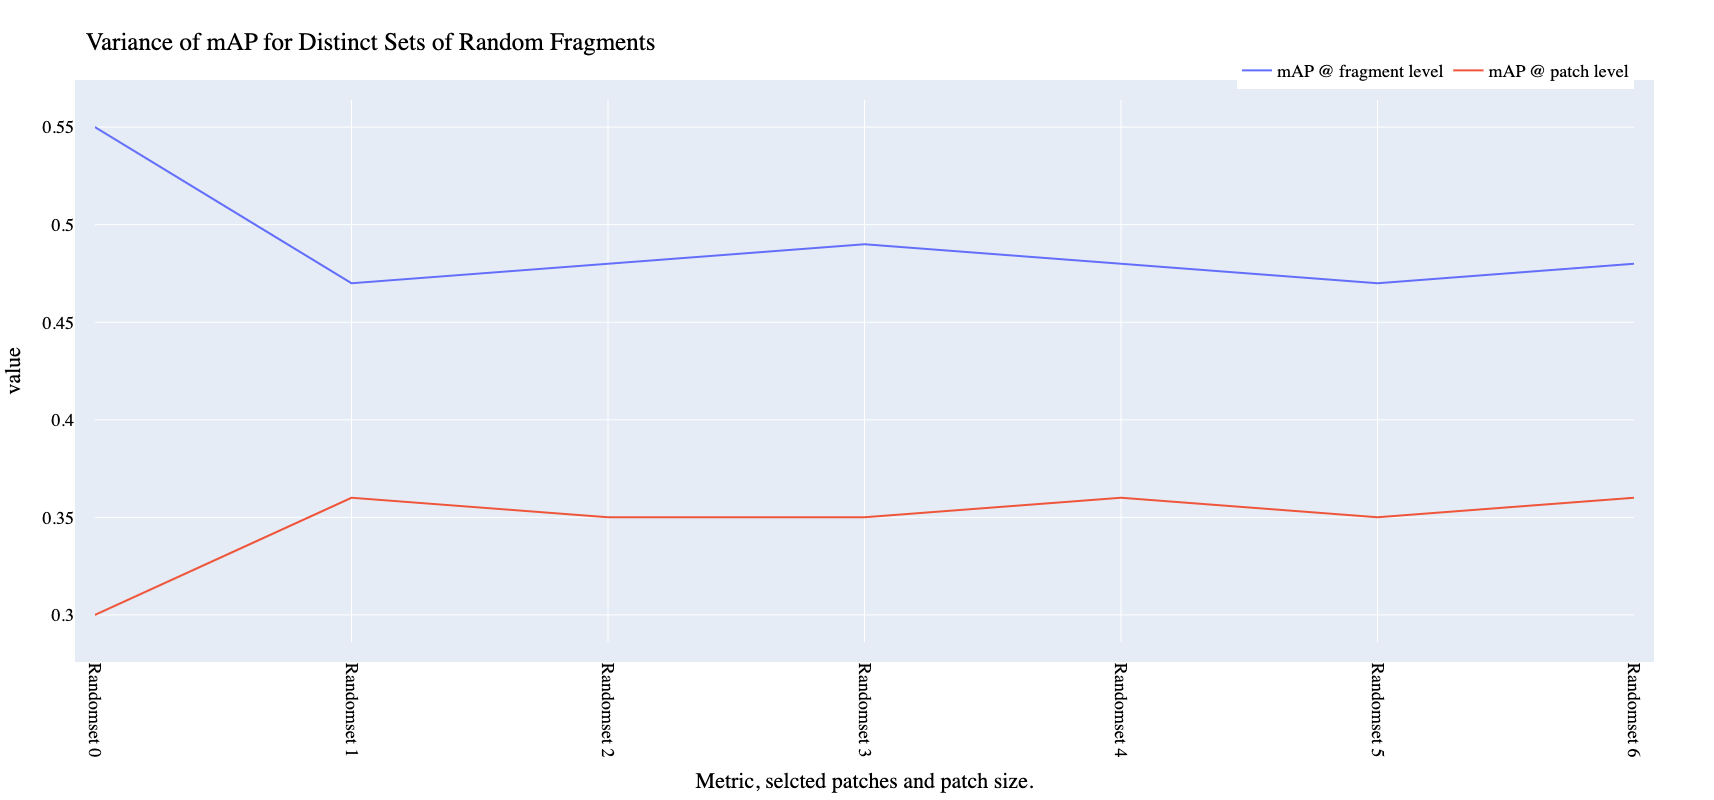

In [32]:
fig = px.line(df,
              x="dataset",
              y="value",
              color='type',
            title='Variance of mAP for Distinct Sets of Random Fragments',
                 width=1200, height=800)


fig.update_layout( margin=dict(
        pad=20
    ),
       xaxis = dict(
           title = 'Metric, selcted patches and patch size.',
           tickangle = 90,
        tickmode = 'array',
    tickvals = [0, 1, 2, 3, 4, 5, 6],
        ticktext = ['Randomset 0',
                    'Randomset 1',
                    'Randomset 2',
                    'Randomset 3',
                    'Randomset 4',
                    'Randomset 5',
                    'Randomset 6']
    ),    
    font=dict(family="Serif",size=18,color='black'),
  legend=dict(title='', orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1))
fig.write_image("images/var_map.pdf")    
fig.show()

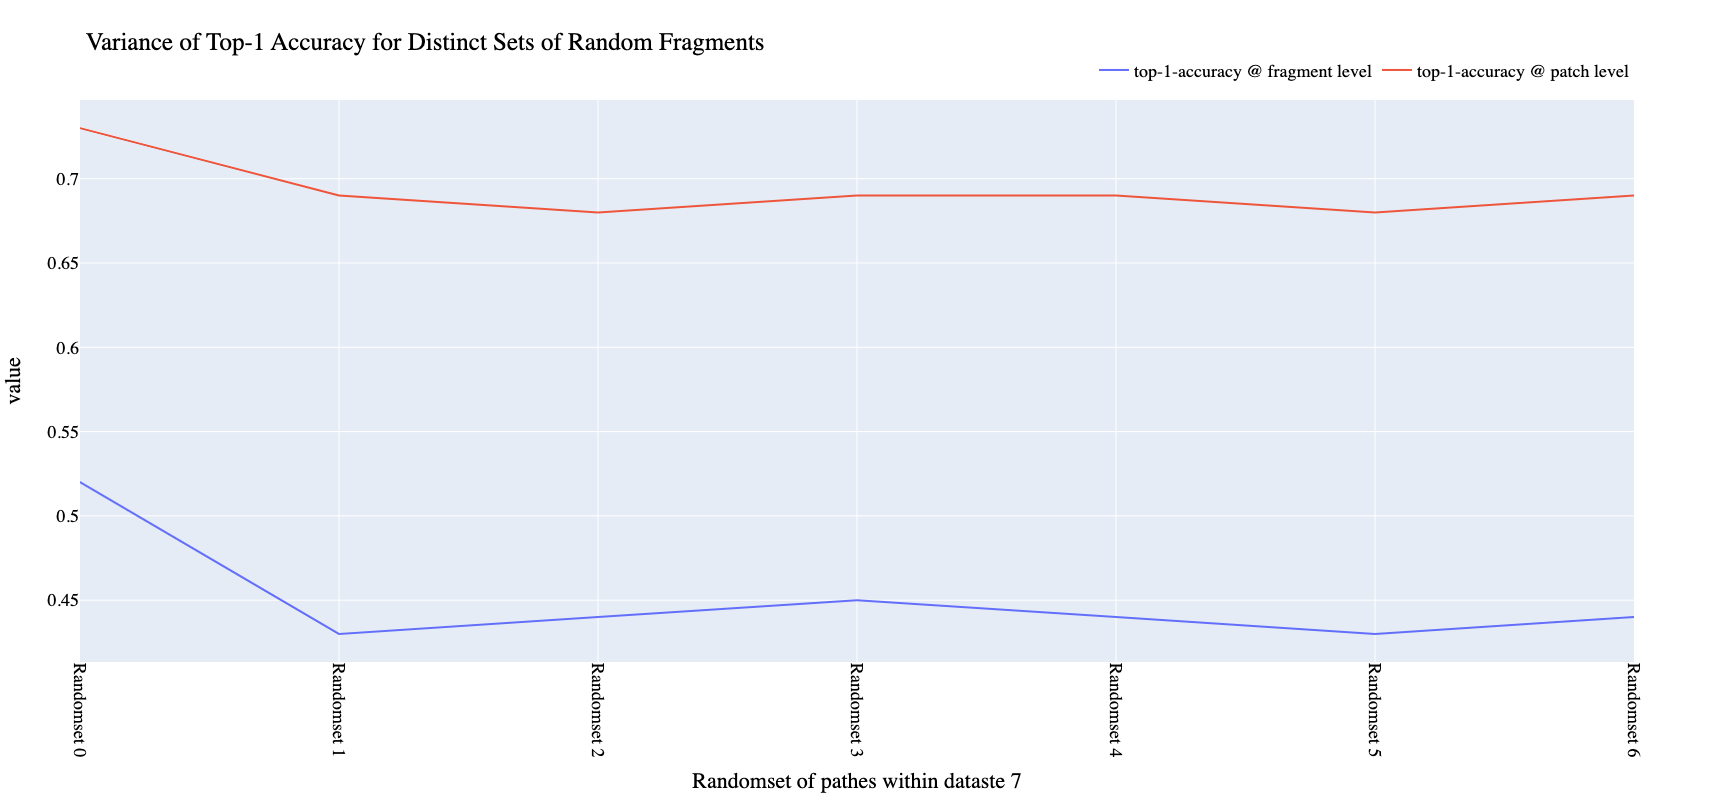

In [33]:
frames = [df_acc_image, df_acc_patches]
df = pd.concat(frames)

fig = px.line(df,
              x="dataset",
              y="value",
              color='type',
            title='Variance of Top-1 Accuracy for Distinct Sets of Random Fragments',
              width=1200, height=800)


fig.update_layout(
       xaxis = dict(
           title = 'Randomset of pathes within dataste 7',
                      tickangle = 90,
        tickmode = 'array',
    tickvals = [0, 1, 2, 3, 4, 5, 6],
        ticktext = ['Randomset 0',
                    'Randomset 1',
                    'Randomset 2',
                    'Randomset 3',
                    'Randomset 4',
                    'Randomset 5',
                    'Randomset 6']
    ),    
    font=dict(family="Serif",size=18,color='black'),
  legend=dict(title='',orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1))
fig.write_image("images/var_acc.pdf")
fig.show()

In [3]:
train = pd.read_csv('training.csv',index_col=0)
val = pd.read_csv('validation.csv', index_col=0)
test = pd.read_csv('test.csv',index_col=0)

In [4]:
train.head()

,epoch,AMI_level0,NMI_level0,mean_average_precision_level0,mean_reciprocal_rank_level0,precision_at_1_level0,best_epoch,best_accuracy
~iteration~,,,,,,,,
1,1,0.295317,0.497989,0.215262,0.614285,0.569354,1,0.569354
2,2,0.314740,0.511415,0.235795,0.649125,0.599093,2,0.599093
3,3,0.372535,0.553464,0.239256,0.696733,0.641593,3,0.641593
4,4,0.391108,0.566485,0.249773,0.717817,0.662325,4,0.662325
5,5,0.407073,0.577800,0.260813,0.733848,0.676919,5,0.676919


In [9]:
train_map = train[['mean_average_precision_level0']].copy()
train_map['type'] = 'train mAP @ patch level'
val_map =  val[['mean_average_precision_level0']].copy()
val_map['type'] = 'validation mAP @ patch level'
test_map = test[['mean_average_precision_level0']].copy()
test_map['type'] = 'test mAP @ patch level'

frames = [train_map, val_map, test_map]
df = pd.concat(frames)

In [10]:
df.head()

,mean_average_precision_level0,type
~iteration~,,
1,0.215262,train mAP @ patch level
2,0.235795,train mAP @ patch level
3,0.239256,train mAP @ patch level
4,0.249773,train mAP @ patch level
5,0.260813,train mAP @ patch level


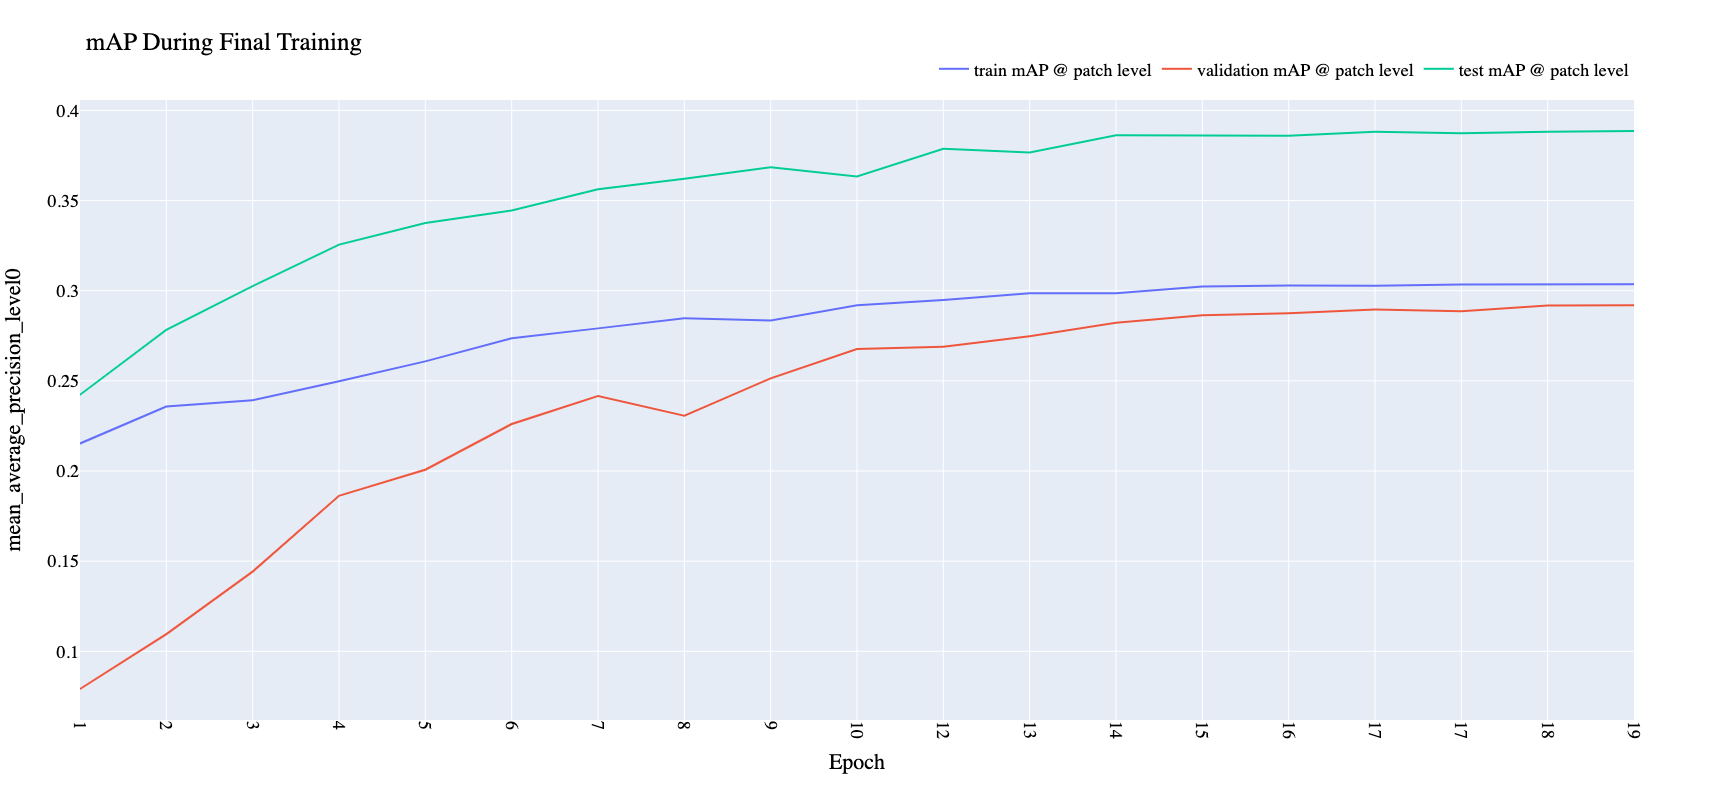

In [15]:
fig = px.line(df,
              x=df.index,
              y="mean_average_precision_level0",
              color='type',
            title='mAP During Final Training',
              width=1200, height=800)


fig.update_layout(
       xaxis = dict(
           range=[1,19],
           title = 'Epoch',
                      tickangle = 90,
        tickmode = 'array',
    tickvals = np.arange(len(train)+1),
        ticktext = ['0',
                    '1',
                    '2',
                    '3',
                    '4',
                    '5',
                    '6',
                   '7',
                   '8',
                   '9','10','12','13','14','15','16','17']
    ),    
    font=dict(family="Serif",size=18,color='black'),
  legend=dict(title='',orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1))

fig.write_image("images/final_map.pdf")
fig.show()


In [16]:
train_acc = train[['precision_at_1_level0']].copy()
train_acc['type'] = 'train top-1-acc @ patch level'
val_acc =  val[['precision_at_1_level0']].copy()
val_acc['type'] = 'validation top-1-acc @ patch level'
test_acc =  test[['precision_at_1_level0']].copy()
test_acc['type'] = 'test top-1-acc @ patch level'
frames = [train_acc, val_acc, test_acc]
df = pd.concat(frames)

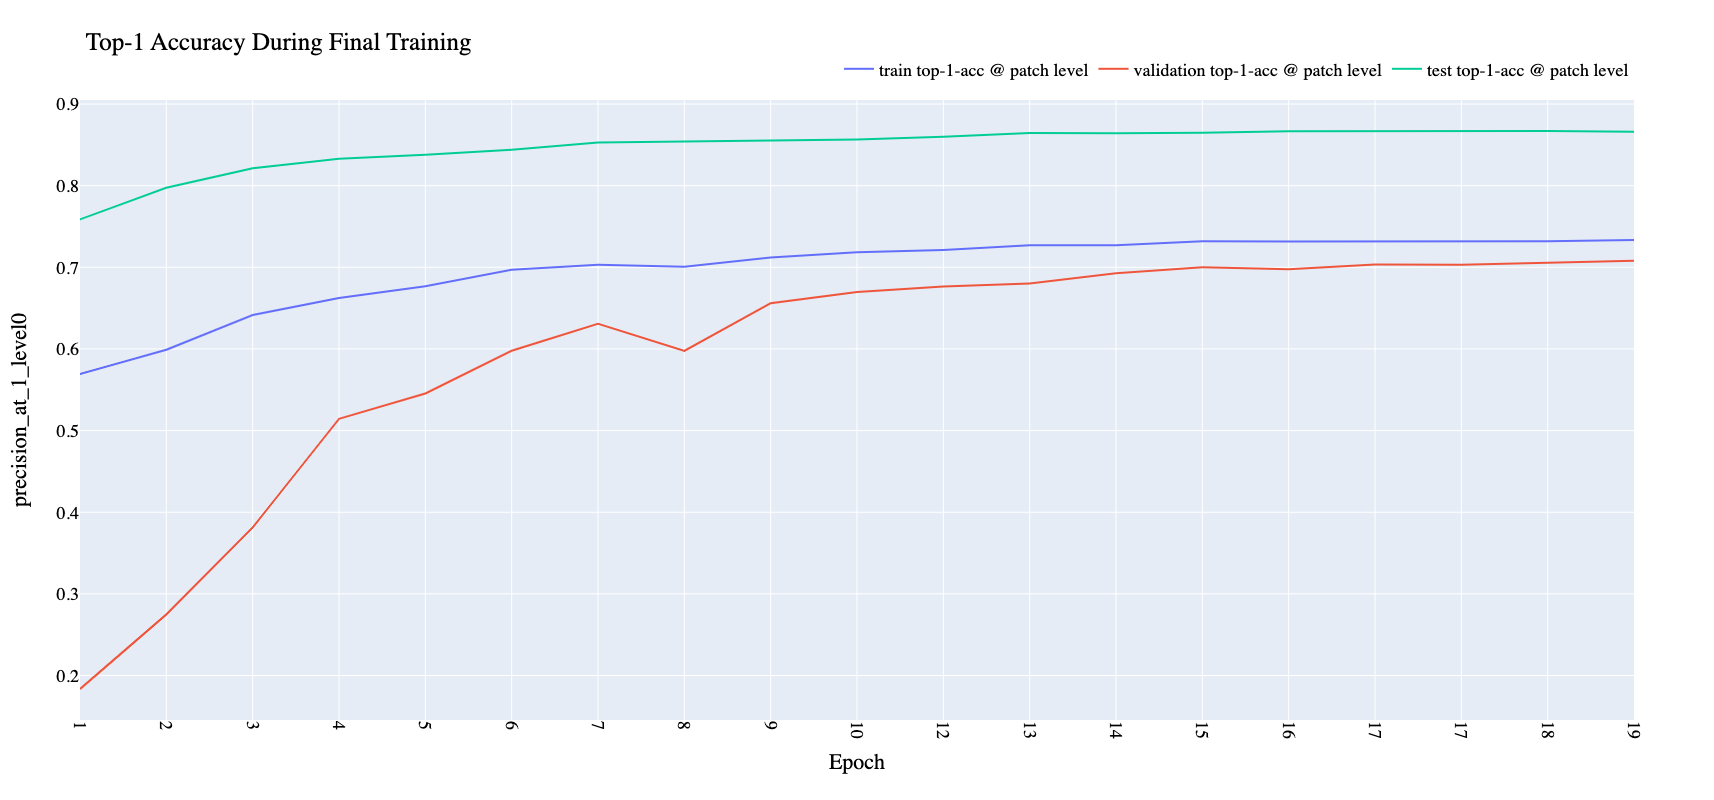

In [17]:
fig = px.line(df,
              x=df.index,
              y="precision_at_1_level0",
              color='type',
            title='Top-1 Accuracy During Final Training',
              width=1200, height=800)


fig.update_layout(
       xaxis = dict(
           range=[1,19],
           title = 'Epoch',
                      tickangle = 90,
        tickmode = 'array',
    tickvals = np.arange(len(train)+1),
        ticktext = ['0',
                    '1',
                    '2',
                    '3',
                    '4',
                    '5',
                    '6',
                   '7',
                   '8',
                   '9','10','12','13','14','15','16','17']
    ),    
    font=dict(family="Serif",size=18,color='black'),
  legend=dict(title='',orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1))
fig.write_image("images/final_acc.pdf")
fig.show()